In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
LAcrime_path = "Resources/Crime_Data_from_2020_to_Present.csv"

# Read the Los Angeles Crime data 
LACrime = pd.read_csv(LAcrime_path)

# Display the data table for preview
LACrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
811659,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
811660,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
811661,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [2]:
# Display the data table info for preview
LACrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811663 entries, 0 to 811662
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           811663 non-null  int64  
 1   Date Rptd       811663 non-null  object 
 2   DATE OCC        811663 non-null  object 
 3   TIME OCC        811663 non-null  int64  
 4   AREA            811663 non-null  int64  
 5   AREA NAME       811663 non-null  object 
 6   Rpt Dist No     811663 non-null  int64  
 7   Part 1-2        811663 non-null  int64  
 8   Crm Cd          811663 non-null  int64  
 9   Crm Cd Desc     811663 non-null  object 
 10  Mocodes         699639 non-null  object 
 11  Vict Age        811663 non-null  int64  
 12  Vict Sex        705139 non-null  object 
 13  Vict Descent    705131 non-null  object 
 14  Premis Cd       811654 non-null  float64
 15  Premis Desc     811184 non-null  object 
 16  Weapon Used Cd  282783 non-null  float64
 17  Weapon Des

In [3]:
LACrime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

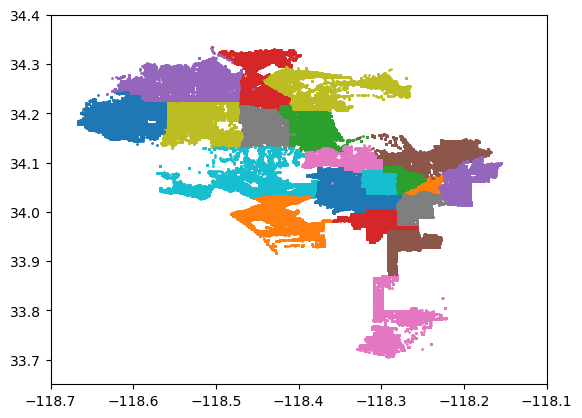

In [4]:
LACrime_clean_loc=LACrime.copy()
LACrime_clean_loc.drop(LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)].index,inplace=True)
LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)]["DR_NO"]
for z in LACrime_clean_loc["AREA NAME"].unique():
    plt.scatter(LACrime_clean_loc[LACrime_clean_loc["AREA NAME"]==z]["LON"],LACrime_clean_loc[LACrime_clean_loc["AREA NAME"]==z]["LAT"],s=1)
    
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)
plt.show()

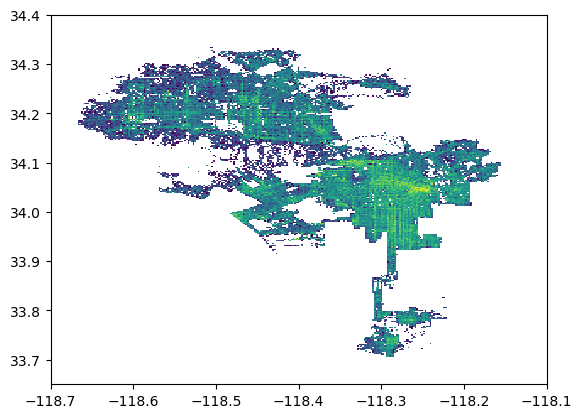

In [5]:
from matplotlib import colors
LACrime_clean_loc=LACrime.copy()
LACrime_clean_loc.drop(LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)].index,inplace=True)
LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)]["DR_NO"]
plt.hist2d(LACrime_clean_loc["LON"],LACrime_clean_loc["LAT"],bins=250,norm = colors.LogNorm())
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)
plt.show()

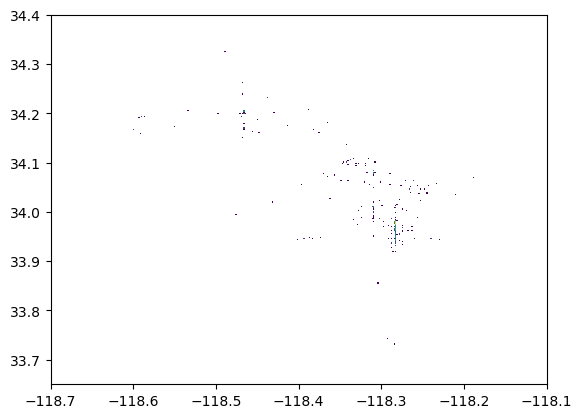

In [6]:
from matplotlib import colors
LACrime_clean_loc=LACrime.copy()
LACrime_clean_loc.drop(LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)].index,inplace=True)
LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)]["DR_NO"]
df = LACrime_clean_loc[LACrime_clean_loc["Crm Cd Desc"].str.contains("HUMAN")]
for z in df["Crm Cd Desc"].unique():
    plt.hist2d(df["LON"],df["LAT"],bins=250,norm = colors.LogNorm())
    
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)
plt.show()

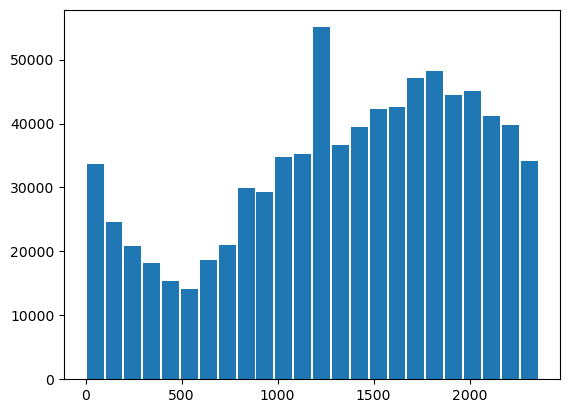

In [7]:
LACrime_clean_loc=LACrime.copy()
plt.hist(LACrime_clean_loc["TIME OCC"],bins=24,rwidth=.9)
plt.show()

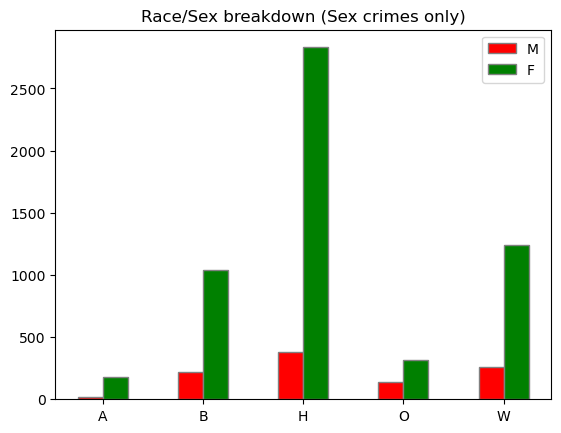

In [8]:
barWidth=0.25
df=LACrime_clean_loc[(LACrime_clean_loc["Vict Sex"]=="M")|
                     (LACrime_clean_loc["Vict Sex"]=="F")]
df=df.loc[(LACrime_clean_loc["Vict Descent"]=="A")|
                         (LACrime_clean_loc["Vict Descent"]=="B")|
                         (LACrime_clean_loc["Vict Descent"]=="H")|
                         (LACrime_clean_loc["Vict Descent"]=="O")|
                         (LACrime_clean_loc["Vict Descent"]=="W"), ["Vict Descent", "Vict Sex", "Crm Cd Desc"]]

df = df[df["Crm Cd Desc"].str.contains("SEX")]
x = df.groupby("Vict Descent").count().index.tolist()
y_male = df.groupby(["Vict Descent", "Vict Sex"]).count().reset_index()
y_female=y_male.drop(y_male[y_male["Vict Sex"]=="M"].index)["Crm Cd Desc"].tolist()
y_male.drop(y_male[y_male["Vict Sex"]=="F"].index, inplace=True)

plt.bar(np.arange(len(x))-.125 , y_male["Crm Cd Desc"].tolist(), color ='r', width = barWidth, edgecolor ='grey', label ='M') 
plt.bar(np.arange(len(x))+.125, y_female, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
plt.xticks(np.arange(len(x)),x)
plt.legend()
plt.title("Race/Sex breakdown (Sex crimes only)")
plt.show()

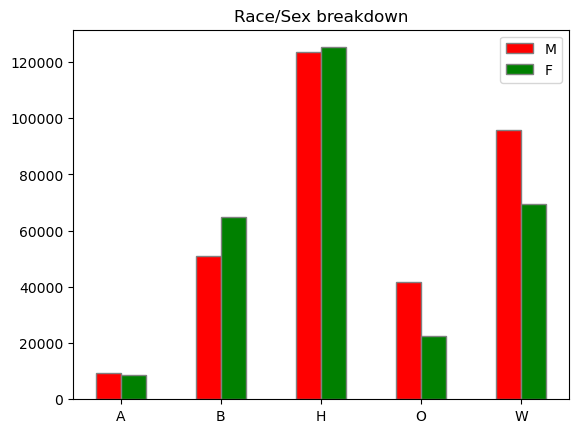

In [9]:
df=LACrime_clean_loc[(LACrime_clean_loc["Vict Sex"]=="M")|
                     (LACrime_clean_loc["Vict Sex"]=="F")]
df=df.loc[(LACrime_clean_loc["Vict Descent"]=="A")|
                         (LACrime_clean_loc["Vict Descent"]=="B")|
                         (LACrime_clean_loc["Vict Descent"]=="H")|
                         (LACrime_clean_loc["Vict Descent"]=="O")|
                         (LACrime_clean_loc["Vict Descent"]=="W"), ["Vict Descent", "Vict Sex", "DR_NO"]]

x = df.groupby("Vict Descent").count().index.tolist()
y_male = df.groupby(["Vict Descent", "Vict Sex"]).count().reset_index()
y_female=y_male.drop(y_male[y_male["Vict Sex"]=="M"].index)["DR_NO"].tolist()
y_male.drop(y_male[y_male["Vict Sex"]=="F"].index, inplace=True)

plt.bar(np.arange(len(x))-.125 , y_male["DR_NO"].tolist(), color ='r', width = barWidth, edgecolor ='grey', label ='M') 
plt.bar(np.arange(len(x))+.125, y_female, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
plt.xticks(np.arange(len(x)),x)
plt.legend()
plt.title("Race/Sex breakdown")
plt.show()

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_13098/4059092666.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age Range"]=pd.cut(df["Vict Age"], bins, labels=labels)


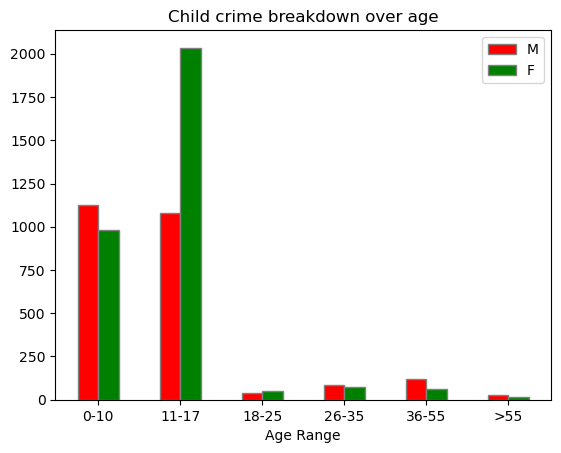

In [10]:
df=LACrime_clean_loc[(LACrime_clean_loc["Vict Sex"]=="M")|
                     (LACrime_clean_loc["Vict Sex"]=="F")]
# df=df.loc[(LACrime_clean_loc["Vict Descent"]=="A")|
#                          (LACrime_clean_loc["Vict Descent"]=="B")|
#                          (LACrime_clean_loc["Vict Descent"]=="H")|
#                          (LACrime_clean_loc["Vict Descent"]=="O")|
#                          (LACrime_clean_loc["Vict Descent"]=="W"), ["Vict Descent", "Vict Sex", "Crm Cd Desc","Vict Age"]]
# df
bins = [0,10.5, 17.5, 25.5, 35.5, 55.5, 100]
labels = ["0-10","11-17","18-25", "26-35", "36-55", ">55"]
df["Age Range"]=pd.cut(df["Vict Age"], bins, labels=labels)

df = df[df["Crm Cd Desc"].str.contains("CHILD")]
df
x = df.groupby("Age Range").count().index.tolist()
y_male = df.groupby(["Age Range", "Vict Sex"]).count().reset_index()
y_female=y_male.drop(y_male[y_male["Vict Sex"]=="M"].index)["Crm Cd Desc"].tolist()
y_male.drop(y_male[y_male["Vict Sex"]=="F"].index, inplace=True)

plt.bar(np.arange(len(x))-.125 , y_male["Crm Cd Desc"].tolist(), color ='r', width = barWidth, edgecolor ='grey', label ='M') 
plt.bar(np.arange(len(x))+.125, y_female, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
plt.xticks(np.arange(len(x)),x)
plt.legend()
plt.title("Child crime breakdown over age")
plt.xlabel("Age Range")
plt.show()